In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import sys
import json
import scipy.stats as stats
import math

In [23]:
def hellinger_explicit(p, q):
    """Hellinger distance between two discrete distributions.
       Same as original version but without list comprehension
    """
    list_of_squares = []
    for p_i, q_i in zip(p, q):

        # caluclate the square of the difference of ith distr elements
        s = (math.sqrt(p_i) - math.sqrt(q_i)) ** 2

        # append 
        list_of_squares.append(s)

    # calculate sum of squares
    sosq = sum(list_of_squares)    

    return sosq / math.sqrt(2)

Load data

In [4]:
SHIPS_load = pd.read_csv('DATA/SHIPS_processed_ALL_BASINS_I_scaled_landmask_INTERP.csv')


In [7]:
SHIPS_load['VMAX_norm'] = SHIPS_load.groupby(['BASIN','TIME'])['VMAX'].transform(lambda x: (x - x.mean()) / x.std())

<AxesSubplot:xlabel='VMAX', ylabel='Density'>

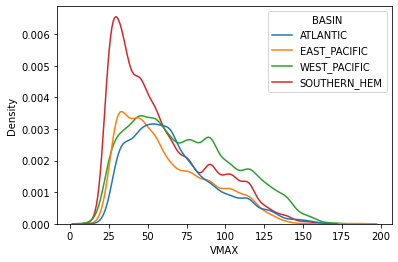

In [18]:
sns.kdeplot(data=SHIPS_load,x='VMAX',hue='BASIN') 

<AxesSubplot:xlabel='VMAX_norm', ylabel='Density'>

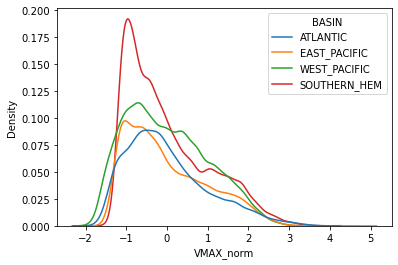

In [19]:
sns.kdeplot(data=SHIPS_load,x='VMAX_norm',hue='BASIN') 

<AxesSubplot:xlabel='I_scaled', ylabel='Density'>

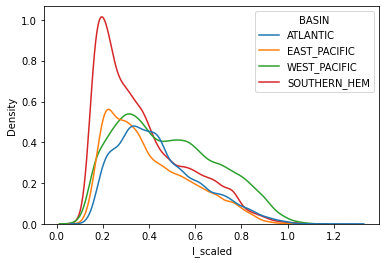

In [20]:
sns.kdeplot(data=SHIPS_load,x='I_scaled',hue='BASIN') 

In [29]:
hellinger_explicit(SHIPS_load.set_index(['BASIN']).xs('ATLANTIC')['VMAX'],
                   SHIPS_load.set_index(['BASIN']).xs('WEST_PACIFIC')['VMAX'])

66717.82329702226

In [33]:
stats.kstest(SHIPS_load.set_index(['BASIN']).xs('EAST_PACIFIC')['VMAX'],
                   SHIPS_load.set_index(['BASIN']).xs('ATLANTIC')['VMAX'])

KstestResult(statistic=0.10947395841208535, pvalue=4.0302813059240626e-73)

In [34]:
stats.kstest(SHIPS_load.set_index(['BASIN']).xs('EAST_PACIFIC')['I_scaled'],
                   SHIPS_load.set_index(['BASIN']).xs('ATLANTIC')['I_scaled'])

KstestResult(statistic=0.1399362897411181, pvalue=2.1266757644055712e-119)